In [5]:
from typing import List, Callable, Dict
import heapq
import matplotlib.pyplot as plt
import timeit
import math

# **Sorting Algorithms**

In [28]:
test_list: list[int] = [64, 34, 25, 12, 22, 11, 90]

def run_tests(sorting_algorithm: Callable[[List[int]], List[int]]) -> None:
    print(f"Original List: {test_list}\nSorted List: {sorting_algorithm(test_list.copy())}\n")

## **Bubble Sort**

Bubble Sort is a simple comparison-based sorting algorithm. It's named "Bubble Sort" because elements tend to move up into the correct order, similar to bubbles rising to the surface.

### **How It Works**

1. **Comparison & Swapping:** Starting from the first element of the list, compare each pair of adjacent items in sequence.
2. **Reordering:** If a pair is in the wrong order, swap them.
3. **Repeating the Process:** Continue this process for each pair of adjacent items, from the first pair to the last one.
4. **Iterating:** Repeat steps 1-3 for the entire list, but now the largest element is already in its final position. Each iteration "bubbles" the next largest element to its correct place.
5. **Termination:** Continue the process until no more swaps are needed. The absence of swaps indicates that the list is sorted.

### **Example**

Consider sorting the list `[5, 2, 9, 1, 5, 6]`. Here's how Bubble Sort will sort it:

1. `[2, 5, 1, 5, 6, 9]` - Swap 5 and 2
2. `[2, 1, 5, 5, 6, 9]` - Swap 5 and 1
3. `[2, 1, 5, 5, 6, 9]` - No swap needed
4. `[2, 1, 5, 5, 6, 9]` - No swap needed
5. `[2, 1, 5, 5, 6, 9]` - No swap needed

The process continues until the list is sorted.

### **Mathematical Explanation**

The key operation of Bubble Sort is the comparison and potential swap of adjacent elements. This operation is performed $O(n)$ times in each pass, and there are $O(n)$ passes in the worst case, making for a total of $O(n^2)$ comparisons and swaps.

### **Complexity Analysis**

- **Time Complexity:** 
    - **Worst-Case:** $O(n^2)$
    - **Average-Case:** $O(n^2)$
    - **Best-Case:** $O(n)$ if the list is already sorted, and the algorithm is optimized to recognize that.
- **Space Complexity:** $O(1)$, as Bubble Sort only requires a constant amount of additional space.

### **Conclusion**

Bubble Sort is easy to understand and implement but is not suitable for large datasets due to its quadratic time complexity in average and worst cases. It can, however, be effective for nearly sorted data or very small data sets.

In [29]:
def bubble_sort(arr: List[int]) -> List[int]:
    n: int = len(arr)
    for i in range(n):
        swapped: bool = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]  # Swapping the elements
                swapped = True
        if not swapped:
            break
    return arr


In [30]:
print("Testing Bubble Sort:")
run_tests(bubble_sort)

Testing Bubble Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Selection Sort**

Selection Sort is a comparison-based sorting algorithm that sorts an array by repeatedly selecting the minimum element from the unsorted part of the array and moving it to the beginning.

### **How It Works**

1. **Finding the Minimum:** Select the minimum element in the array.
2. **Swapping:** Swap the found minimum element with the first element.
3. **Iterating:** Move the boundary of the unsorted part one element to the right, and repeat steps 1-2 until the array is sorted.

### **Example**

Consider sorting the list `[64, 25, 12, 22, 11]`. Here's how Selection Sort will sort it:

1. `[11, 25, 12, 22, 64]` - Swap 11 and 64
2. `[11, 12, 25, 22, 64]` - Swap 12 and 25
3. `[11, 12, 22, 25, 64]` - Swap 22 and 25
4. `[11, 12, 22, 25, 64]` - No swap needed, as the last two elements are already sorted

### **Mathematical Explanation**

The key operation of Selection Sort is the comparison of elements to find the minimum. This operation is performed $O(n)$ times in each pass, and there are $O(n)$ passes in total, making for a total of $O(n^2)$ comparisons.

### **Complexity Analysis**

- **Time Complexity:**
    - **Worst-Case:** $O(n^2)$
    - **Average-Case:** $O(n^2)$
    - **Best-Case:** $O(n^2)$ since even if the list is sorted, the algorithm will still perform all the comparisons.
- **Space Complexity:** $O(1)$, as Selection Sort only requires a constant amount of additional space.

### **Conclusion**

Selection Sort is simple to understand and code but, like Bubble Sort, is inefficient on large lists, and generally performs worse than similar algorithms like Insertion Sort. Its main advantage is that it performs a minimal number of swaps, making it useful in situations where swapping is particularly expensive.

In [31]:
def selection_sort(arr: List[int]) -> List[int]:
    for i in range(len(arr)):
        min_idx: int = i
        for j in range(i + 1, len(arr)):
            if arr[min_idx] > arr[j]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr


In [32]:
print("Testing Selection Sort:")
run_tests(selection_sort)

Testing Selection Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Insertion Sort**

Insertion Sort is a simple comparison-based sorting algorithm that builds the final sorted array one item at a time. It is much less efficient on large lists than more advanced algorithms such as Quick Sort, Heap Sort, or Merge Sort.

### **How It Works**

1. **Iteration:** Start from the second element (considering the first element as sorted).
2. **Selection:** Select the current element and compare it with the previous elements.
3. **Insertion:** Move all the elements greater than the current element up by one position to make space for the current element, and then insert the current element into its correct position.
4. **Repeating:** Repeat the process for each of the elements in the list.

### **Example**

Consider sorting the list `[12, 11, 13, 5, 6]`. Here's how Insertion Sort will sort it:

1. `[12, 11, 13, 5, 6]` - 11 is compared with 12, and they are swapped.
2. `[11, 12, 13, 5, 6]` - 13 is in the correct place.
3. `[5, 11, 12, 13, 6]` - 5 is moved to the first position.
4. `[5, 6, 11, 12, 13]` - 6 is moved to the second position.

### **Mathematical Explanation**

Insertion Sort involves $n-1$ passes, and for each pass, the number of comparisons and movements can vary from 0 to $n-1$, depending on the existing order of the elements. Therefore, the total number of operations can be expressed as an arithmetic progression leading to the time complexity analysis.

### **Complexity Analysis**

- **Time Complexity:**
    - **Worst-Case:** $O(n^2)$, when the array is sorted in reverse order.
    - **Average-Case:** $O(n^2)$, for randomly ordered data.
    - **Best-Case:** $O(n)$, when the array is already sorted, as only $n-1$ comparisons are needed, and no swaps.
- **Space Complexity:** $O(1)$, as it only requires a single additional memory space.

### **Conclusion**

Insertion Sort is adaptive, meaning it becomes faster when the input is partially sorted. While it's not suitable for large datasets, it has the advantage of being stable (maintains the relative order of equal elements) and having a simple implementation. It can be useful for small datasets or as a final step in more advanced sorting algorithms.

In [33]:
def insertion_sort(arr: List[int]) -> List[int]:
    for i in range(1, len(arr)):
        key: int = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

In [34]:
print("Testing Insertion Sort:")
run_tests(insertion_sort)

Testing Insertion Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Merge Sort**

Merge Sort is a divide-and-conquer sorting algorithm that recursively breaks down a list into sublists until each sublist consists of a single element and then merges those sublists to produce new sorted sublists until there is only one sorted list remaining.

### **How It Works**

1. **Dividing:** Recursively divide the unsorted list into $n$ sublists, each containing one element.
2. **Conquering:** Repeatedly merge sublists to produce newly sorted sublists until there is only one sorted sublist remaining.

### **Example**

Consider sorting the list `[38, 27, 43, 3, 9, 82, 10]`. Here's how Merge Sort will sort it:

1. Divide into `[38], [27], [43], [3], [9], [82], [10]`
2. Merge into `[27, 38], [3, 43], [9, 82], [10]`
3. Merge into `[3, 27, 38, 43], [9, 10, 82]`
4. Merge into `[3, 9, 10, 27, 38, 43, 82]`

### **Mathematical Explanation**

The division step takes $ O(\log n) $ time as the list is divided into two halves until there's only one element left. The merge step takes $ O(n) $ time as it has to look at every item. Since both steps are performed together, the total time complexity is $ O(n \log n) $.

### **Complexity Analysis**

- **Time Complexity:**
    - **Worst-Case:** $ O(n \log n) $
    - **Average-Case:** $ O(n \log n) $
    - **Best-Case:** $ O(n \log n) $
- **Space Complexity:** $ O(n) $, as Merge Sort requires a temporary array equal to the size of the original input.

### **Conclusion**

Merge Sort is a very consistent sorting algorithm, guaranteeing $ O(n \log n) $ performance regardless of the initial distribution of the input. Its main disadvantage is its $ O(n) $ space complexity, which can be a limitation if memory is a concern. It's a stable sort, meaning that it preserves the relative order of equal elements, and is often used in practice, especially for linked lists and large arrays where its consistent performance is valuable.

In [35]:
def merge_sort(arr: List[int]) -> List[int]:
    if len(arr) <= 1:
        return arr
    mid: int = len(arr) // 2
    left: List[int] = merge_sort(arr[:mid])
    right: List[int] = merge_sort(arr[mid:])

    return merge(left, right)

def merge(left: List[int], right: List[int]) -> List[int]:
    result: List[int] = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result += left[i:]
    result += right[j:]
    return result


In [36]:
print("Testing Merge Sort:")
run_tests(merge_sort)

Testing Merge Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Quick Sort**

Quick Sort is a divide-and-conquer sorting algorithm that works by selecting a 'pivot' element from the array and partitioning the other elements into two subarrays according to whether they are less than or greater than the pivot. The subarrays are then sorted recursively.

### **How It Works**

1. **Choosing a Pivot:** Select a 'pivot' element from the array. The choice of pivot selection can greatly affect the algorithm's performance.
2. **Partitioning:** Partition the other elements into two subarrays, according to whether they are less than or greater than the pivot.
3. **Recursion:** Recursively apply the above steps to the two subarrays.
4. **Combining:** Join the subarrays back together.

### **Example**

Consider sorting the list `[3, 6, 8, 10, 1, 2, 1]`. If we pick 6 as the pivot, here's how Quick Sort will sort it:

1. Partition into `[3, 1, 2, 1], [6], [8, 10]`
2. Recursively sort the subarrays
3. Combine into `[1, 1, 2, 3, 6, 8, 10]`

### **Mathematical Explanation**

The time complexity of Quick Sort depends heavily on the pivot selection strategy:

- The best case occurs when the pivot is always the median, and the list is divided into two equal parts, leading to a time complexity of $O(n \log n)$.
- The worst case occurs when the pivot is always the smallest (or largest) element, leading to unbalanced partitions and a time complexity of $O(n^2)$.

### **Complexity Analysis**

- **Time Complexity:**
    - **Worst-Case:** $O(n^2)$, typically when the pivot is consistently poor (e.g., already sorted or reverse sorted array).
    - **Average-Case:** $O(n \log n)$, for most real-world data.
    - **Best-Case:** $O(n \log n)$, when the pivot consistently splits the array evenly.
- **Space Complexity:** $O(\log n)$ due to the stack space required for recursion (in-place partitioning).

### **Conclusion**

Quick Sort is often faster in practice than other $O(n \log n)$ algorithms such as Merge Sort, especially for built-in types like integers and pointers. However, its performance can degrade to $O(n^2)$ if the pivot values are consistently poorly chosen. The choice of the pivot selection strategy can greatly affect the algorithm's efficiency, with more sophisticated methods often leading to more consistent performance. It's not a stable sort, so equal elements may change their relative order during the sort.

In [37]:
def quick_sort(arr: List[int]) -> List[int]:
    if len(arr) <= 1:
        return arr
    pivot: int = arr[len(arr) // 2]
    left: List[int] = [x for x in arr if x < pivot]
    middle: List[int] = [x for x in arr if x == pivot]
    right: List[int] = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)


In [38]:
print("Testing Quick Sort:")
run_tests(quick_sort)

Testing Quick Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Heap Sort**

Heap Sort is a comparison-based sorting algorithm that leverages the heap data structure, a specialized binary tree with particular properties. It's one of the few in-place sorting algorithms with a worst-case time of $O(n \log n)$, making it one of the most efficient sorting algorithms in typical situations.

### **How It Works**

1. **Building a Heap:** Convert the original array into a max-heap, a binary tree where the parent node is greater than or equal to its children.
2. **Extracting Elements:** Repeatedly remove the largest element (root of the heap) and insert it at the end of the array.
3. **Heapify:** After removing the largest element, rebuild the heap.
4. **Repeat:** Repeat steps 2 and 3 until the heap contains only one element.

### **Example**

Consider sorting the list `[3, 19, 1, 14, 8, 7]`. Here's how Heap Sort will sort it:

1. Build a max-heap: `[19, 14, 7, 3, 8, 1]`
2. Swap the root with the last element and heapify: `[14, 8, 7, 3, 1, 19]`
3. Repeat the process: `[8, 3, 7, 1, 14, 19]`
4. Continue until sorted: `[1, 3, 7, 8, 14, 19]`

### **Mathematical Explanation**

The key to Heap Sort's efficiency is in the heapify operation, which can be done in $O(\log n)$ time. Building the initial heap takes $O(n)$ time, and each of the $n$ extractions takes $O(\log n)$ time, leading to an overall time complexity of $O(n \log n)$.

### **Complexity Analysis**

- **Time Complexity:**
    - **Worst-Case:** $O(n \log n)$
    - **Average-Case:** $O(n \log n)$
    - **Best-Case:** $O(n \log n)$ - no best-case scenario as the building of the heap is necessary for every given input.
- **Space Complexity:** $O(1)$ - Since Heap Sort is an in-place sorting algorithm, it does not require additional storage.

### **Conclusion**

Heap Sort is a robust and efficient sorting algorithm suitable for large datasets. It has consistent $O(n \log n)$ time complexity, but it's not stable, meaning that equal elements may change their relative order during the sort. While often outperformed by Quick Sort on typical data sets, Heap Sort has the advantage of a worst-case time complexity that's as good as its average-case complexity, providing performance guarantees that Quick Sort can't match without additional modifications.

In [39]:
def heap_sort(arr: List[int]) -> List[int]:
    heapq.heapify(arr)
    return [heapq.heappop(arr) for _ in range(len(arr))]

In [40]:
print("Testing Heap Sort:")
run_tests(heap_sort)

Testing Heap Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Counting Sort**

Counting Sort is a non-comparison-based integer sorting algorithm. Unlike other sorting algorithms that compare elements, Counting Sort counts the number of distinct elements and uses arithmetic to place each number in its correct position in the output array. This method is applicable to integers within a specific range.

### **How It Works**

1. **Finding the Range:** Determine the maximum value in the input array to understand the range of input values.
2. **Counting Occurrences:** Count the occurrences of each number within the input array using an auxiliary counting array.
3. **Calculating Cumulative Counts:** Transform the count array such that each element at each index stores the sum of the previous counts.
4. **Building the Sorted Array:** Using the count array, place the elements from the input array into their correct positions in the output array.
5. **Copying to Original:** Copy the sorted elements from the output array to the original array.

### **Example**

Consider sorting the list `[4, 2, 2, 8, 3, 3, 1]`. Here's how Counting Sort will sort it:

1. Maximum value is 8, so count array size is 9: `[0, 1, 2, 2, 1, 0, 0, 0, 1]`
2. Cumulative counts: `[0, 1, 3, 5, 6, 6, 6, 6, 7]`
3. Place elements in sorted array using cumulative counts.
4. Sorted array: `[1, 2, 2, 3, 3, 4, 8]`

### **Mathematical Explanation**

The algorithm divides its input into a fixed number of categories, corresponding to the range of input values. It then counts the number of items falling into each category.

### **Complexity Analysis**

- **Time Complexity:**
    - **Worst-Case:** $O(n + k$
    - **Average-Case:** $O(n + k)$
    - **Best-Case:** $O(n + k)$, where $n$ is the number of elements in the input array, and $k$ is the range of the input.
- **Space Complexity:** $O(n + k)$ where $n$ is the size of the array, and $k$ is the range of input values.

### **Conclusion**

Counting Sort is a very efficient algorithm when the range of potential items $k$ is reasonably small compared to the number of items $n$. It's stable, which means that the relative order of equal elements will be preserved, and it's one of the few algorithms that can achieve better-than-$O(n \log n)$ performance in suitable situations. However, it's not suitable for sorting arrays of numbers that have a significant range (where $k$ is much larger than $n$ as it requires space proportional to that range.

In [41]:
def counting_sort(arr: List[int]) -> List[int]:
    if not arr:
        return arr
    max_val: int = max(arr)
    count: List[int] = [0] * (max_val + 1)
    output: List[int] = [0] * len(arr)

    for num in arr:
        count[num] += 1

    for i in range(1, len(count)):
        count[i] += count[i - 1]

    for i in range(len(arr) - 1, -1, -1):
        output[count[arr[i]] - 1] = arr[i]
        count[arr[i]] -= 1

    return output


In [42]:
print("Testing Counting Sort:")
run_tests(counting_sort)

Testing Counting Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Radix Sort**

Radix Sort is a non-comparative integer sorting algorithm. Unlike other sorting algorithms that use comparisons, Radix Sort distributes the numbers based on each digit, one digit at a time, from the least significant to the most significant. This method requires that the integers are represented in the same numeral system, typically the decimal system.

### **How It Works**

1. **Finding the Maximum Digit Length:** Determine the number of digits in the largest number in the input array.
2. **Sorting by Individual Digits:** Sort the numbers based on each digit, starting from the least significant digit (LSD) and moving towards the most significant digit (MSD).
3. **Distributing into Buckets:** For each digit place, distribute the numbers into buckets according to the value of that digit.
4. **Collecting from Buckets:** Collect the numbers back into the array, maintaining the order within each bucket.
5. **Repeating for Each Digit:** Repeat steps 3-4 for each digit place until the numbers are sorted.

### **Example**

Consider sorting the list `[170, 45, 75, 90, 802, 24, 2, 66]`. Here's how Radix Sort will sort it:

1. Maximum number of digits is 3.
2. Sorting by LSD (units place): `[170, 90, 802, 2, 24, 45, 75, 66]`
3. Sorting by next digit (tens place): `[802, 2, 24, 45, 66, 170, 75, 90]`
4. Sorting by MSD (hundreds place): `[2, 24, 45, 66, 75, 90, 170, 802]`

### **Mathematical Explanation**

Radix Sort distributes the input into buckets and then collects the items from the buckets. This process is repeated once for each digit in the longest number, so if the longest number has $d$ digits, the distribution and collection process must be repeated $d$ times.

### **Complexity Analysis**

- **Time Complexity:**
    - **Worst-Case:** $O(d \cdot (n + k))$
    - **Average-Case:** $O(d \cdot (n + k))$
    - **Best-Case:** $O(d \cdot (n + k))$ where $n$ is the number of elements, $k$ is the range of digits (usually 10 for decimal numbers), and $d$ is the number of digits in the largest number.
- **Space Complexity:** $O(n + k)$

### **Conclusion**

Radix Sort can be a highly efficient sorting algorithm for integers or strings of the same length, especially when $d$ (the number of digits in the largest number) is small relative to $n$ (the number of items). It is stable, which ensures that the relative order of equal elements will remain the same. However, Radix Sort is not suitable for numbers that may have vastly differing numbers of digits or are represented in floating-point format, and its efficiency can be less appealing when the largest number has many more digits than the average number in the array.

In [43]:
def radix_sort(arr: List[int]) -> List[int]:
    if not arr:
        return arr
    max_val: int = max(arr)
    exp: int = 1
    n: int = len(arr)
    output: List[int] = [0] * n

    while max_val // exp > 0:
        counting_sort_exp(arr, exp, output)
        arr = output.copy()
        exp *= 10
    return arr


def counting_sort_exp(arr: List[int], exp: int, output: List[int]):
    n: int = len(arr)
    count: List[int] = [0] * 10

    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    for i in range(n - 1, -1, -1):
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1

In [44]:
print("Testing Radix Sort:")
run_tests(radix_sort)

Testing Radix Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Bucket Sort**

Bucket Sort is a distribution sorting algorithm that distributes the elements of an array into a number of buckets and then uses another sorting method to sort the elements within each bucket. It works by dividing the value range into $n$ buckets and then distributing the $n$ input items into the appropriate bucket. After that, the contents of the buckets are sorted, usually by a different sorting algorithm, and then gathered into a sorted array.

### **How It Works**

1. **Create Buckets:** Divide the value range into $n$ equally spaced subranges or "buckets."
2. **Distribute Elements:** Scan the input array, placing each element into its corresponding bucket.
3. **Sort Individual Buckets:** Sort the contents of each non-empty bucket. A different sorting algorithm (like Insertion Sort) can be used for this.
4. **Concatenate Buckets:** Concatenate the contents of the buckets in order to obtain the sorted array.

### **Example**

Consider sorting the list `[29, 25, 3, 49, 9, 37, 21, 43]`. Here's how Bucket Sort will sort it:

1. Create 5 buckets.
2. Distribute: 
    - Bucket 1: `[3, 9]`
    - Bucket 2: `[25, 21]`
    - Bucket 3: `[29]`
    - Bucket 4: `[49, 37, 43]`
    - Bucket 5: `[]`
3. Sort each bucket:
    - Bucket 1: `[3, 9]`
    - Bucket 2: `[21, 25]`
    - Bucket 3: `[29]`
    - Bucket 4: `[37, 43, 49]`
4. Concatenate to get `[3, 9, 21, 25, 29, 37, 43, 49]`.

### **Mathematical Explanation**

The time complexity depends on the distribution of the elements and the sorting algorithm used to sort the individual buckets. If the elements are uniformly distributed, then each bucket will contain $ \frac{n}{k} $ elements, where $ k $ is the number of buckets.

### **Complexity Analysis**

- **Time Complexity:**
    - **Worst-Case:** $O(n^2)$ when all elements end up in the same bucket.
    - **Average-Case:** $O(n + k)$ for uniformly distributed elements.
    - **Best-Case:** $O(n + k)$ when each bucket has roughly the same number of elements.
- **Space Complexity:** $O(n + k)$ where $n$ is the number of elements in the array, and $k$ is the number of buckets.

### **Conclusion**

Bucket Sort works well when the input is uniformly distributed over a range. It is often used as a subroutine in Radix Sort. It can be quite efficient for data that can be evenly distributed into buckets, but its performance can degrade if this is not the case, particularly if one or more buckets end up containing a majority of the elements. Its space complexity is also a consideration, as the algorithm must allocate space for the buckets in addition to the input array.

In [45]:
def bucket_sort(arr: List[int]) -> List[int]:
    if len(arr) == 0:
        return arr

    min_val, max_val = min(arr), max(arr)
    bucket_range: float = (max_val - min_val) / len(arr)
    buckets: List[int] = [[] for _ in range(len(arr) + 1)]

    for num in arr:
        index: int = int((num - min_val) / bucket_range)
        buckets[index].append(num)

    sorted_arr: List[int] = []
    for bucket in buckets:
        sorted_arr += sorted(bucket)

    return sorted_arr


In [46]:
print("Testing Bucket Sort:")
run_tests(bubble_sort)

Testing Bucket Sort:
Original List: [64, 34, 25, 12, 22, 11, 90]
Sorted List: [11, 12, 22, 25, 34, 64, 90]



## **Comparing Sorting Algorithms**

### **Advantages and Disadvantages**

1. **Bubble Sort**
   - Advantages:
     - Simple to understand and implement.
     - In-place sorting (only requires a small auxiliary space).
   - Disadvantages:
     - Poor performance on large lists.
     - Not suitable for practical applications with large datasets.

2. **Selection Sort**
   - Advantages:
     - Simple and easy to implement.
     - Performs well on small lists.
   - Disadvantages:
     - Inefficient on large lists.
     - Not adaptive, performance is poor even if the list is partially sorted.

3. **Insertion Sort**
   - Advantages:
     - Simple implementation.
     - Efficient for small data sets and nearly sorted lists.
   - Disadvantages:
     - Quadratic time complexity makes it inefficient for large datasets.

4. **Merge Sort**
   - Advantages:
     - Stable sort.
     - Predictable time complexity.
   - Disadvantages:
     - Uses extra space.
     - Slower than the more advanced algorithms in some cases.

5. **Quick Sort**
   - Advantages:
     - Fast for large datasets.
     - In-place sort.
   - Disadvantages:
     - Worst-case time complexity can be quadratic.
     - Unstable sort.

6. **Heap Sort**
   - Advantages:
     - In-place sort.
     - Time complexity is guaranteed to be $O(n \log n)$.
   - Disadvantages:
     - Slower in practice on small data.
     - Unstable sort.

7. **Counting Sort**
   - Advantages:
     - Fast when the range of input values (k) is not significantly larger than the number of values (n).
     - Stable sort.
   - Disadvantages:
     - Space complexity can be high.
     - Not suitable for negative numbers or floating-point values.

8. **Radix Sort**
   - Advantages:
     - Fast for numbers with lots of digits.
     - Stable sort.
   - Disadvantages:
     - Performance depends on the number of digits.
     - Uses extra space.

9. **Bucket Sort**
   - Advantages:
     - Can be very fast when the input is uniformly distributed.
     - Can utilize other sorting methods internally.
   - Disadvantages:
     - Performance drops when the distribution is not uniform.
     - Requires extra space for buckets.

### **Table Comparing Complexities**

| Algorithm       | Best Case       | Average Case    | Worst Case      |
|-----------------|-----------------|-----------------|-----------------|
| Bubble Sort     | $O(n)$        | $O(n^2)$      | $O(n^2)$      |
| Selection Sort  | $O(n^2)$      | $O(n^2)$      | $O(n^2)$      |
| Insertion Sort  | $O(n)$        | $O(n^2)$      | $O(n^2)$      |
| Merge Sort      | $O(n \log n)$ | $O(n \log n)$ | $O(n \log n)$ |
| Quick Sort      | $O(n \log n)$ | $O(n \log n)$ | $O(n^2)$      |
| Heap Sort       | $O(n \log n)$ | $O(n \log n)$ | $O(n \log n)$ |
| Counting Sort   | $O(n + k)$     | $O(n + k)$    | $O(n + k)$    |
| Radix Sort      | $O(d \cdot (n + k))$ | $O(d \cdot (n + k))$ | $O(d \cdot (n + k))$ |
| Bucket Sort     | $O(n + k)$     | $O(n + k)$    | $O(n^2)$      |

Note: In the above table, $n$ is the number of items being sorted, $k$ is the range of the input, and $d$ is the number of digits in the largest number.

In [47]:
def compare_algorithms(algorithms: Dict[str, Callable[[List[int]], List[int]]], lists_to_sort: List[List[int]]) -> None:
    for name, algorithm in algorithms.items():
        times: List[float] = []
        for lst in lists_to_sort:
            # Time the sorting algorithm on this list and repeat it 10 times for accuracy
            timer = timeit.Timer(lambda: algorithm(lst.copy()))
            times.append(timer.timeit(number=10))
        plt.plot([len(lst) for lst in lists_to_sort], times, label=name)

    plt.xlabel('List Length')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.show()


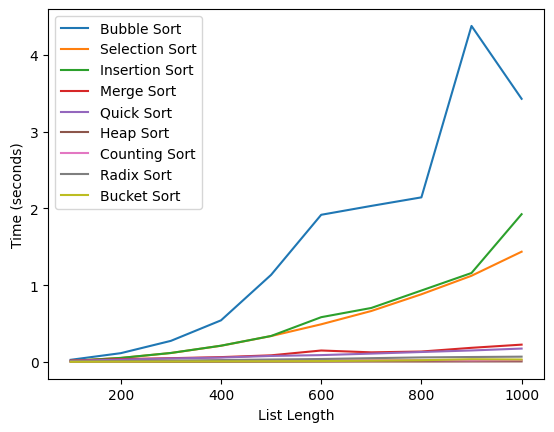

In [48]:
algorithms = {
    'Bubble Sort': bubble_sort,
    'Selection Sort': selection_sort,
    'Insertion Sort': insertion_sort,
    'Merge Sort': merge_sort,
    'Quick Sort': quick_sort,
    'Heap Sort': heap_sort,
    'Counting Sort': counting_sort,
    'Radix Sort': radix_sort,
    'Bucket Sort': bucket_sort
}

# Generating some random test cases of different sizes
import random
lists_to_sort = [random.sample(range(1000), k=i) for i in range(100, 1001, 100)]

compare_algorithms(algorithms, lists_to_sort)

# **Searching Algorithms**

In [15]:
test_list: List[int] = [64, 34, 25, 12, 22, 11, 90]
sorted_test_list: List[int] = sorted(test_list)

def run_search_tests(search_algorithm: Callable[[List[int], int], int], is_sorted: bool = False) -> None:
    test_value: int = 22  # Value we want to search for in the list
    search_list: List[int] = sorted_test_list if is_sorted else test_list
    
    print(f"List: {search_list}\nSearching for {test_value}")
    index: int = search_algorithm(search_list, test_value)
    
    if index != -1:
        print(f"Value found at index: {index}\n")
    else:
        print(f"Value not found in the list\n")

## **Linear Search**

Linear search is a straightforward method for finding a particular value within a list. It scans the list sequentially, checking each element until it finds the target value.

### **How It Works**

1. **Starting at the Beginning:** Begin at the first element of the list.
2. **Checking Each Element:** Compare each element to the target value in sequence.
3. **Found or Not Found:** If an element matches the target value, return the index of that element. If the end of the list is reached without finding the target, return that the value is not found.

### **Example**

Consider searching for the value `6` in the list `[5, 2, 9, 1, 5, 6]`. Here's how Linear Search will process it:

1. Check 5 - not a match
2. Check 2 - not a match
3. Check 9 - not a match
4. Check 1 - not a match
5. Check 5 - not a match
6. Check 6 - match found, return index `5`

### **Mathematical Explanation**

The key operation of Linear Search is the comparison between the target value and the current element in the list. This operation is performed $O(n)$ times in the worst case, where $n$ is the number of elements in the list.

### **Complexity Analysis**

- **Time Complexity:** 
    - **Worst-Case:** $O(n)$
    - **Average-Case:** $O(n/2)$ on average, assuming the target is equally likely to be any element in the list.
    - **Best-Case:** $O(1)$ if the target value is the first element.
- **Space Complexity:** $O(1)$, as Linear Search only requires a constant amount of additional space.

### **Conclusion**

Linear Search is easy to understand, implement, and doesn't require the data to be sorted. However, its efficiency is less than optimal for large datasets, especially when compared to other search algorithms that take advantage of sorted data, such as Binary Search. For small data sets or unsorted data where more advanced algorithms can't be used, Linear Search is a reliable option.

In [3]:
def linear_search(arr: List[int], target: int) -> int:
    for index, value in enumerate(arr):
        if value == target:
            return index
    return -1

In [ ]:
run_search_tests(linear_search, is_sorted=False)

## **Binary Search**

A Binary Search Tree (BST) is a hierarchical data structure in which each node has at most two children, known as the left child and the right child. A key property of a BST is that for any given node, the values in its left subtree are less than its value, and the values in its right subtree are greater.

### **How It Works**

1. **Start at the Root:** Begin the search at the root node of the tree.
2. **Compare with Target:** Compare the current node's value with the target value.
3. **Branch Decision:** If the target is less than the current node's value, search the left subtree. If greater, search the right subtree. If equal, the target has been found.
4. **Repeating the Process:** Repeat steps 2-3 in the corresponding subtree until either the target is found or a leaf node is reached without finding the target.
5. **Termination:** Return the node if found, or indicate that the value is not found if the search reaches a leaf node without a match.

### **Example**

Consider searching for the value `15` in a BST with the following nodes: `[20, 10, 30, 5, 15]`. The search proceeds as follows:

1. Start at 20 - not a match, target is less, so go left
2. Arrive at 10 - not a match, target is greater, so go right
3. Arrive at 15 - match found, return the node

### **Mathematical Explanation**

The key operation of the Binary Search Tree is the comparison between the target value and the current node's value. Because the tree is binary, each comparison eliminates about half of the remaining nodes from consideration. The total number of comparisons in the worst case is therefore $O(\log n)$, where $n$ is the number of nodes in the tree.

### **Complexity Analysis**

- **Time Complexity:**
    - **Worst-Case:** $O(n)$ if the tree is unbalanced and degenerates into a linked list
    - **Average-Case:** $O(\log n)$ for a balanced tree
    - **Best-Case:** $O(\log n)$ for a balanced tree
- **Space Complexity:** $O(1)$, as the search only requires a constant amount of additional space, not counting the space required for the tree itself.

### **Conclusion**

Binary Search Tree provides an efficient way to search for a value, particularly when the tree is balanced. It is generally more efficient than linear search but requires the data to adhere to the BST property. Care must be taken to maintain the tree's balance for consistent performance, as an unbalanced tree can degrade into a linear search in the worst case.

In [4]:
def binary_search(arr: List[int], target: int) -> int:
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = left + (right - left) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

In [ ]:
run_search_tests(binary_search, is_sorted=True)

## **Jump Search**

Jump Search is a searching algorithm designed for ordered lists. The basic idea is to check fewer elements by jumping ahead fixed steps, then performing a linear search within the range where the element is expected to reside.

### **How It Works**

1. **Divide into Blocks:** Divide the sorted list into blocks of size $m$.
2. **Jumping:** Jump $m$ steps at a time until a block containing a range of values greater than the target value is found.
3. **Linear Search:** Perform a linear search within the previous block to find the target value.
4. **Termination:** If the element is found, return its location; if not, return that the element is not in the list.

### **Example**

Consider searching for the value `55` in a sorted list: `[1, 4, 9, 16, 25, 36, 49, 64, 81]`, with a block size of 3.

1. Jump to index 2 - value is 9, continue
2. Jump to index 5 - value is 36, continue
3. Jump to index 8 - value is 81, previous block start index is 6
4. Linear search from index 6 to 8, find `55` at index 7

### **Mathematical Explanation**

The optimal size of the block to be jumped is $\sqrt{n}$, where $n$ is the size of the list. Jumping back requires at most $\sqrt{n}$ linear searches, and jumping ahead requires $\sqrt{n}$ jumps for a total of $O(\sqrt{n})$ operations.

### **Complexity Analysis**

- **Time Complexity:** 
    - **Worst-Case:** $O(\sqrt{n})$
    - **Average-Case:** $O(\sqrt{n})$
    - **Best-Case:** $O(1)$ if the first element is the target
- **Space Complexity:** $O(1)$

### **Conclusion**

Jump Search is an effective algorithm for searching in sorted lists, particularly when direct access (such as random access in an array) is available. It's faster than a linear search but slower than a binary search. The advantage is that it doesn't require the list to support random access, so it can be used with sequential data structures like linked lists. It's a trade-off between speed and simplicity, often providing a reasonable middle ground in practice.

In [16]:
def jump_search(arr: List[int], target: int) -> int:
    step = math.sqrt(len(arr))
    prev = 0
    
    while arr[min(int(step), len(arr)) - 1] < target:
        prev = step
        step += math.sqrt(len(arr))
        if prev >= len(arr):
            return -1
    
    for i in range(int(prev), min(int(step), len(arr))):
        if arr[i] == target:
            return i
    return -1


In [17]:
run_search_tests(jump_search, is_sorted=True)

List: [11, 12, 22, 25, 34, 64, 90]
Searching for 22
Value found at index: 2



## **Interpolation Search**

Interpolation Search is a searching algorithm that applies on uniformly distributed sorted lists. It's an improvement over Binary Search where the middle element is selected for comparison. Interpolation Search uses values of left, right, and the target value to find the position of the target.

### **How It Works**

1. **Calculate Position:** Determine the position of the target value using the formula:

   $$
   pos = left + \frac{(target - arr[left]) \times (right - left)}{arr[right] - arr[left]}
   $$

   where $arr$ is the array, $target$ is the value to find, and $left$ and $right$ are the boundary indices of the current sub-array.
   
2. **Check Position:** If the element at $pos$ is the target, return $pos$. If the target is less than the element at $pos$, update $right = pos - 1$. If the target is greater, update $left = pos + 1$.
3. **Repeat:** Repeat steps 1-2 until the target is found or the boundaries overlap.
4. **Termination:** If the element is found, return its location; if not, return that the element is not in the list.

### **Example**

Consider searching for the value `7` in a sorted list: `[1, 2, 3, 4, 5, 6, 7, 8, 9]`.

1. Calculate pos as 6 - the value is 7
2. Found at index 6

### **Mathematical Explanation**

The interpolation formula essentially estimates the position of the target value, assuming a uniform distribution. By probing the estimated position first, it can eliminate large portions of the search space, speeding up the search.

### **Complexity Analysis**

- **Time Complexity:** 
    - **Worst-Case:** $O(n)$ for non-uniformly distributed lists
    - **Average-Case:** $O(\log \log n)$ for uniformly distributed lists
    - **Best-Case:** $O(1)$ if the first element is the target
- **Space Complexity:** $O(1)$

### **Conclusion**

Interpolation Search can be an extremely efficient algorithm for searching in uniformly distributed sorted lists. It's particularly useful when the data is not only sorted but also evenly distributed, as the algorithm leverages this property to jump directly closer to the target. If the data is not uniformly distributed, the performance can degrade to that of a linear search, so understanding the characteristics of the input data is essential when choosing this algorithm.

In [6]:
def interpolation_search(arr: List[int], target: int) -> int:
    left, right = 0, len(arr) - 1
    while left <= right and target >= arr[left] and target <= arr[right]:
        if left == right:
            if arr[left] == target:
                return left
            return -1

        pos = left + ((target - arr[left]) * (right - left)) // (arr[right] - arr[left])
        if arr[pos] == target:
            return pos
        if arr[pos] < target:
            left = pos + 1
        else:
            right = pos - 1
    return -1


In [18]:
run_search_tests(interpolation_search, is_sorted=True)

List: [11, 12, 22, 25, 34, 64, 90]
Searching for 22
Value found at index: 2



## **Hash Table Lookup**

Hash Table Lookup is a technique used to quickly access an element in a collection, such as an array or a database. The key to its efficiency is the hash function, which takes an input (or "key") and returns a fixed-size string of bytes, usually a hash code. This code is then mapped to an index in the array, allowing for quick retrieval.

### **How It Works**

1. **Hashing:** When looking up a value by its key, the key is passed through a hash function, which converts it into a hash code.
2. **Index Mapping:** The hash code is then used to calculate an index in the array. Often, the hash code is divided by the array size, and the remainder is used as the index.
3. **Retrieve Value:** The value associated with the key is then accessed at the calculated index in the array.
4. **Handling Collisions:** If two keys hash to the same index (a collision), additional steps must be taken to determine the correct value. Common collision resolution techniques include separate chaining (where each array index points to a linked list of keys that hash to that index) or open addressing (where alternate indices are probed until an open slot is found).

### **Example**

Consider a hash table with keys as names and values as phone numbers, and you want to find the phone number for "John."

1. Hash "John" to get hash code, e.g., 12345
2. Calculate index, e.g., 12345 % 100 = 45
3. Retrieve the phone number at index 45

### **Mathematical Explanation**

The hashing function's goal is to distribute the keys uniformly across the array. It needs to minimize collisions and efficiently resolve them when they occur.

### **Complexity Analysis**

- **Time Complexity:** 
    - **Average-Case:** $O(1)$
    - **Worst-Case:** $O(n)$ if all keys collide and collision is handled with a linear structure like a linked list.
- **Space Complexity:** $O(n)$ for storing n key-value pairs

### **Conclusion**

Hash table lookup is generally very fast, with an average time complexity of $O(1)$. However, the worst-case time complexity can degrade to $O(n)$ if the hash function does not distribute the keys uniformly, leading to many collisions. Therefore, the choice and implementation of the hash function are crucial for maintaining performance. The method of collision resolution can also significantly impact performance. Overall, hash tables provide an efficient means of key-value storage and retrieval and are widely used in various computer science applications.

In [7]:
def hash_table_lookup(hash_table: dict, key: int) -> int:
    return hash_table.get(key, -1)


In [19]:
hash_table = {value: index for index, value in enumerate(test_list)}
search_value = 22
print(f"Searching for {search_value} using Hash Table Lookup")
if search_value in hash_table:
    print(f"Value found at index: {hash_table[search_value]}\n")
else:
    print(f"Value not found in the list\n")


Searching for 22 using Hash Table Lookup
Value found at index: 4



## **Binary Search Tree Lookup**

Binary Search Tree (BST) Lookup is a method used to find a specific key in a binary search tree. A binary search tree is a binary tree in which every node has a key, and the keys in the left subtree of a node are less than the key in the node, while keys in the right subtree of the node are greater than the key in the node.

### **How It Works**

1. **Start at Root:** Begin the search from the root of the tree.
2. **Compare and Traverse:** Compare the key with the current node's key:
   - If equal, return the node (key found).
   - If the key is less than the current node's key, move to the left child.
   - If the key is greater than the current node's key, move to the right child.
3. **Repeat:** Continue this process until either the key is found or the current node becomes null (key not found).

### **Example**

Consider searching for the key `15` in the following BST:

```
        10
       /  \
      5   20
          / \
        15   30
```

1. Compare `15` with `10` (root), move right.
2. Compare `15` with `20`, move left.
3. Compare `15` with `15`, key found.

### **Mathematical Explanation**

The lookup operation's efficiency depends on the tree's height. In a balanced tree where the keys are evenly distributed, the height is logarithmic. In an unbalanced tree where the keys may all lie on one side, the height can be linear.

### **Complexity Analysis**

- **Time Complexity:** 
    - **Worst-Case:** $O(n)$, if the tree becomes a linked list (skewed tree).
    - **Average-Case:** $O(\log n)$, if the tree is balanced.
- **Space Complexity:** $O(1)$, as BST lookup only requires a constant amount of additional space.

### **Conclusion**

Binary Search Tree Lookup is an efficient way to find a specific key in a collection, especially if the tree is balanced. However, its performance can degrade significantly if the tree becomes unbalanced. Techniques like AVL trees or Red-Black trees can be employed to keep the tree balanced, thus ensuring consistently efficient lookups.

In [22]:
class TreeNode:
    def __init__(self, value: int):
        self.value = value
        self.left = None
        self.right = None

def bst_insert(root: TreeNode, value: int) -> TreeNode:
    if not root:
        return TreeNode(value)
    if value < root.value:
        root.left = bst_insert(root.left, value)
    else:
        root.right = bst_insert(root.right, value)
    return root

def bst_search(root: TreeNode, target: int) -> bool:
    if not root:
        return False
    if target == root.value:
        return True
    elif target < root.value:
        return bst_search(root.left, target)
    else:
        return bst_search(root.right, target)

In [23]:
bst = None
sorted_test_list = [11, 12, 22, 25, 34, 64, 90]
for value in sorted_test_list:
    bst = bst_insert(bst, value)

search_value = 22
print(f"Searching for {search_value} using Binary Search Tree")
if bst_search(bst, search_value):
    print(f"Value found\n")
else:
    print(f"Value not found in the tree\n")


Searching for 22 using Binary Search Tree
Value found



## **B-Tree Search**

B-tree Search is a method used to find a specific key in a B-tree. B-trees are balanced tree data structures that maintain sorted data in a way that allows searches, insertions, and deletions in logarithmic time. They are widely used in databases and file systems.

### **How It Works**

1. **Start at Root:** Begin the search from the root of the tree.
2. **Find the Child:** Compare the key with the keys in the current node:
   - If equal to one of the keys, return the key (found).
   - If less than the first key, follow the first child.
   - If greater than the last key, follow the last child.
   - If in between two keys, follow the child between them.
3. **Repeat:** Continue this process with the child node until either the key is found or a leaf node is reached without finding the key (key not found).

### **Example**

Consider searching for the key `15` in a B-tree of order `3`:

```
        10
       /  \
     5   15  20
    / \  / \  / \
  1   6 11 16 21 30
```

1. Compare `15` with `10` in the root, move right.
2. Find `15` in the next node, key found.

### **Mathematical Explanation**

B-trees are designed to work efficiently with large amounts of data that might not fit into main memory. The order of the B-tree, denoted by $t$, is the minimum number of children a non-root internal node can have. The maximum number of keys in any node is $2t - 1$.

The key property of a B-tree that ensures logarithmic search time is that it remains balanced. Even in the worst case, the height of the tree is logarithmic in the number of keys.

### **Complexity Analysis**

- **Time Complexity:** 
    - **Worst-Case:** $O(\log n)$, where $n$ is the number of keys in the tree.
    - **Average-Case:** $O(\log n)$
- **Space Complexity:** $O(1)$, as B-tree search only requires a constant amount of additional space.

### **Conclusion**

B-tree Search is an extremely efficient and reliable method for searching keys, especially for systems that deal with large amounts of data that may not entirely fit into main memory. The logarithmic time complexity ensures fast lookups, making it suitable for applications like databases and file systems where quick data retrieval is crucial.

In [26]:
class BTreeNode:
    def __init__(self, leaf: bool=True):
        self.leaf = leaf
        self.keys = []
        self.child = []

class BTree:
    def __init__(self, t: int):
        self.root = BTreeNode(True)
        self.t = t # Minimum degree of B-tree

    def search(self, k: int, x: BTreeNode = None) -> BTreeNode:
        if x is not None:
            i = 0
            while i < len(x.keys) and k > x.keys[i]:
                i += 1
            if i < len(x.keys) and k == x.keys[i]:
                return (x, i)
            elif x.leaf:
                return None
            else:
                return self.search(k, x.child[i])
        else:
            return self.search(k, self.root)

    def split_child(self, x: BTreeNode, i: int):
        t = self.t
        y = x.child[i]
        z = BTreeNode(y.leaf)
        x.child.insert(i + 1, z)
        x.keys.insert(i, y.keys[t - 1])
        
        z.keys = y.keys[t: (2 * t) - 1]
        y.keys = y.keys[0: t - 1]

        if not y.leaf:
            z.child = y.child[t: 2 * t]
            y.child = y.child[0: t - 1]

    def insert(self, k: int):
        root = self.root
        if len(root.keys) == (2 * self.t) - 1:
            temp = BTreeNode()
            temp.child.insert(0, root)
            self.split_child(temp, 0)
            self.root = temp
            self.insert_non_full(temp, k)
        else:
            self.insert_non_full(root, k)

    def insert_non_full(self, x: BTreeNode, k: int):
        i = len(x.keys) - 1
        if x.leaf:
            x.keys.append(None)
            while i >= 0 and k < x.keys[i]:
                x.keys[i + 1] = x.keys[i]
                i -= 1
            x.keys[i + 1] = k
        else:
            while i >= 0 and k < x.keys[i]:
                i -= 1
            i += 1
            if len(x.child[i].keys) == (2 * self.t) - 1:
                self.split_child(x, i)
                if k > x.keys[i]:
                    i += 1
            self.insert_non_full(x.child[i], k)


In [29]:
btree = BTree(t=5)  # Minimum degree of the B-tree
for value in sorted_test_list:
    btree.insert(value)

search_value = 22
print(f"Searching for {search_value} using B-tree")
if btree.search(search_value):
    print(f"Value found\n")
else:
    print(f"Value not found in the tree\n")


Searching for 22 using B-tree
Value found



## **Red-Black Tree (RBT)**

Red-Black Tree (RBT) is a self-balancing Binary Search Tree (BST) where every node has a color either red or black. It's a complex but highly efficient form of a binary search tree, adhering to specific properties that enable faster lookup, insertion, and deletion operations.

### **How Red-Black Tree Lookup Works**

1. **Start at Root:** Begin the search from the root of the tree.
2. **Traverse the Tree:** Compare the key with the current node:
   - If equal, return the node (key found).
   - If less, move to the left child.
   - If greater, move to the right child.
3. **Repeat:** Continue this process until either the key is found or a null child is reached (key not found).

### **Example**

Consider searching for the key `15` in the following Red-Black Tree:

```
       (B)10
       /    \
  (R)5       (R)15
```
- Compare `15` with `10` in the root, move right.
- Find `15` in the next node, key found.

### **Mathematical Explanation**

The operations in a Red-Black Tree are guaranteed to take $O(\log n)$ time because the tree satisfies the following properties:

- Every node has a color either red or black.
- The root is always black.
- There are no two adjacent red nodes.
- Every path from root to a null pointer has the same black nodes.

These properties ensure that the tree remains approximately balanced, providing logarithmic height.

### **Complexity Analysis**

- **Time Complexity:**
    - **Worst-Case:** $O(\log n)$, where $n$ is the number of nodes in the tree.
    - **Average-Case:** $O(\log n)$
- **Space Complexity:** $O(1)$, as Red-Black Tree search only requires a constant amount of additional space.

### **Conclusion**

Red-Black Trees offer a highly efficient way to perform lookups. The balancing properties of the tree ensure that it does not degenerate into a linked list, thus providing quick search capabilities even as the tree grows in size. This makes Red-Black Trees suitable for use in many algorithms and data structures where fast search is required, such as associative containers in many programming languages' standard libraries.

In [35]:
class Node:
    def __init__(self, data, color, parent=None):
        self.data = data
        self.color = color
        self.parent = parent
        self.left = None
        self.right = None

class RedBlackTree:
    NIL_LEAF = Node(None, 'black')
    
    def __init__(self):
        self.TNULL = self.NIL_LEAF
        self.root = self.TNULL


    def pre_order_helper(self, node):
        if node != self.TNULL:
            print(node.data, end=" ")
            self.pre_order_helper(node.left)
            self.pre_order_helper(node.right)

    def search_tree_helper(self, node, key):
        if node == self.TNULL or key == node.data:
            return node

        if key < node.data:
            return self.search_tree_helper(node.left, key)
        return self.search_tree_helper(node.right, key)
    
    def left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.TNULL:
            y.left.parent = x

        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def right_rotate(self, x):
        y = x.left
        x.left = y.right
        if y.right != self.TNULL:
            y.right.parent = x

        y.parent = x.parent
        if x.parent == None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y

    def balance_insert(self, node):
        while node.parent.color == 'red':
            if node.parent == node.parent.parent.right:
                uncle = node.parent.parent.left
                if uncle.color == 'red':
                    uncle.color = 'black'
                    node.parent.color = 'black'
                    node.parent.parent.color = 'red'
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self.right_rotate(node)
                    node.parent.color = 'black'
                    node.parent.parent.color = 'red'
                    self.left_rotate(node.parent.parent)
            else:
                uncle = node.parent.parent.right
                if uncle.color == 'red':
                    uncle.color = 'black'
                    node.parent.color = 'black'
                    node.parent.parent.color = 'red'
                    node = node.parent.parent
                else:
                    if node == node.parent.right:
                        node = node.parent
                        self.left_rotate(node)
                    node.parent.color = 'black'
                    node.parent.parent.color = 'red'
                    self.right_rotate(node.parent.parent)
            if node == self.root:
                break
        self.root.color = 'black'

    def insert(self, key):
        node = Node(key, 'red')
        node.parent = None
        node.data = key
        node.left = self.TNULL
        node.right = self.TNULL
        node.color = 'red'

        y = None
        x = self.root

        while x != self.TNULL:
            y = x
            if node.data < x.data:
                x = x.left
            else:
                x = x.right

        node.parent = y
        if y == None:
            self.root = node
        elif node.data < y.data:
            y.left = node
        else:
            y.right = node

        if node.parent == None:
            node.color = 'black'
            return

        if node.parent.parent == None:
            return

        self.balance_insert(node)

    def search(self, k):
        return self.search_tree_helper(self.root, k)

In [36]:
rb_tree = RedBlackTree()
for value in sorted_test_list:
    rb_tree.insert(value)

search_value = 22
print(f"Searching for {search_value} using Red-Black Tree")
if rb_tree.search(search_value):
    print(f"Value found\n")
else:
    print(f"Value not found in the tree\n")


Searching for 22 using Red-Black Tree
Value found



## **Trie Search**

A Trie (pronounced "try") is a tree-like data structure used for storing a dynamic set of strings, where the keys are usually strings. It's especially used for retrieval, and the primary advantage of using a Trie is that it provides fast searching for words and prefixes. It's widely used in applications like autocompletion.

### **How Trie Search Works**

1. **Start at Root:** Begin the search from the root of the Trie.
2. **Traverse the Trie:** For each character in the word:
   - Look for the character among the current node's children.
   - If found, move to the corresponding child node and continue.
   - If not found, return that the word does not exist in the Trie.
3. **Check End of Word:** If you've traversed the entire word and the current node's end-of-word flag is set, the word exists in the Trie. If not, it doesn't.

### **Example**

Consider searching for the word "bat" in a Trie containing "bat", "ball", "batman", "batwoman", "batter", "battle".

- Start at the root.
- Move to the child node representing 'b', then to 'a', and then to 't'.
- Reach a node where the end-of-word flag is set. The word "bat" is found.

### **Mathematical Explanation**

The lookup operation in a Trie depends on the length of the word that needs to be searched. Since every character in the word needs to be examined, the time complexity is proportional to the length of the word.

### **Complexity Analysis**

- **Time Complexity:**
    - **Worst-Case:** $O(m)$, where $m$ is the length of the word to be searched.
    - **Average-Case:** $O(m)$
- **Space Complexity:** $O(1)$, as Trie search only requires a constant amount of additional space.

### **Conclusion**

Trie search is an efficient way to search for words in a set of strings, especially when there are common prefixes among the words. It provides a time complexity that is linear with respect to the length of the word being searched, rather than the number of words in the set. This makes Tries particularly useful in applications like dictionaries, phonebooks, and text prediction, where quick lookup times are essential.

In [37]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.end_of_word = False

class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, word: str) -> None:
        node = self.root
        for char in word:
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.end_of_word = True

    def search(self, word: str) -> bool:
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]
        return node.end_of_word


In [39]:
trie = Trie()

# Inserting the elements from test_list into the Trie
for value in test_list:
    trie.insert(str(value))  # Convert the integer to string before insertion

# Searching for a particular value
search_value = 22
if trie.search(str(search_value)):  # Convert the integer to string before searching
    print(f"The value {search_value} is present in the Trie.")
else:
    print(f"The value {search_value} is not present in the Trie.")


The value 22 is present in the Trie.
